In [1]:
from keras.layers import Dense, Dropout 
#from keras.layers.recurrent import LSTM, GRU 
from keras.layers import LSTM, GRU 
from keras.models import Sequential 
import pandas as pd 
import numpy as np 
import scipy.io as sio
from keras.layers import Flatten 
from keras.layers import GRU,Bidirectional
from keras.layers import Conv1D, MaxPooling1D
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import StratifiedKFold 
import utils.tools as utils 
from keras.models import load_model

2024-02-10 22:26:58.280004: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 22:26:58.312608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 22:26:58.312650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 22:26:58.315129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 22:26:58.321949: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 22:26:58.322654: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
def create_model():
    model = Sequential() 
    model.add(Bidirectional(GRU(8,return_sequences=True))) 
    model.add(Dropout(0.5)) 
    model.add(Bidirectional(GRU(4,return_sequences=True)))
    model.add(Dropout(0.5)) 
    model.add(Flatten()) 
    model.add(Dense(2, activation='sigmoid' ,name="Dense_2")) 
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics =['accuracy'])
    
    return model

In [24]:
def indepTesting(Xtest, Ytest):
     Sepscores = []
     ytest = np.ones((1, 2)) * 0.5
     yscore = np.ones((1, 2)) * 0.5
     print("this is the shape of Xtest", Xtest.shape)
     print("this is the shape of Ytest", Ytest.shape)
     xtest = np.vstack(Xtest)
     print("this is the shape of xtest", xtest.shape)
     y_test = np.vstack(Ytest)
     print("this is the shape of y_test", y_test.shape)
     #saved_model_path = 'C:/Users/Ali/Downloads/ACP-CapsuleGAN_model/ACP-CapsuleGAN_model/model/ali.h5'  # Replace with your model's file path
     #saved_model_path = 'E:/POSTDOC_HBKU/Task7/Papers/ACP/Datasets/ACP_Main/DCGR/Ali_Zakir_CapsuleGAN/model/dcgr.h5'# Replace with your model's file path
     saved_model_path = r"BiGRU_CNN.h5"
     ldmodel = load_model(saved_model_path)
     print("Loaded model from disk")
     y_score = ldmodel.predict(Xtest)
     yscore = np.vstack((yscore, y_score))
     y_class = utils.categorical_probas_to_classes(y_score)

     fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
     roc_auc = auc(fpr, tpr)
     acc, precision, npv, sensitivity, specificity, mcc, f1 = utils.calculate_performance(len(y_class), y_class,
                                                                                         y_test)
     Sepscores.append([acc, precision,npv,sensitivity, specificity, mcc,f1,roc_auc])
     print('acc=%f,precision=%f,npv=%f,sensitivity=%f,specificity=%f,mcc=%f,f1=%f,roc_auc=%f'
           % (acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc))
     fpr, tpr, _ = roc_curve(y_test[:, 0], y_score[:, 1])
     auc_score = auc(fpr, tpr)
     scores = np.array(Sepscores)
     result1 = np.mean(scores, axis=0)
     H1 = result1.tolist()
     Sepscores.append(H1)
     result = Sepscores
     row = y_score.shape[0]
     yscore = y_score[np.array(range(1, row)), :]
     yscore_sum = pd.DataFrame(data=yscore)
     yscore_sum.to_csv('yscore_sum_CPSR_ind.csv')
     y_test = y_test[np.array(range(1, row)), :]
     ytest_sum = pd.DataFrame(data=y_test)
     ytest_sum.to_csv('ytest_sum_CPSR_ind.csv')
     colum = ['ACC', 'precision', 'npv', 'Sn', 'Sp', 'MCC', 'F1', 'AUC']
     data_csv = pd.DataFrame(columns=colum, data=result)  # , index=ro)
     data_csv.to_csv('Result_CPSR_ind.csv')
     lw = 2
     plt.plot(fpr, tpr, color='darkorange',
              lw=lw, label='SVC ROC (area = %0.2f%%)' % auc_score)
     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
     plt.xlim([0.0, 1.05])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title('Receiver operating characteristic')
     plt.legend(loc="lower right")
     plt.grid()
     plt.show()


In [ ]:
     data_test = sio.loadmat('AVP_D2_CPSR_test.mat')
     data_test = data_test.get('AVP_D2_CPSR_test')  # Remove the data in the dictionary
     print("this is test", data_test.shape)
     label1_test = np.ones((60, 1))  # Value can be changed
     label2_test = np.zeros((60, 1))
     label_test = np.append(label1_test, label2_test)
     scale_data = scale(data_test)
     label_test = np.array(label_test)
     indepxtest = scale_data
     indepXtest = np.reshape(indepxtest,(-1,1,n1))
     indepYtest = label_test
     

In [9]:

data_train = sio.loadmat('AVP_D2_CPSR_train.mat')
data = data_train.get('AVP_D2_CPSR_train')  # Remove the data in the dictionary
[m1,n1]=np.shape(data) 
label1 = np.ones((544 , 1))  # Value can be changed
label2 = np.zeros((544, 1))
label = np.append(label1, label2)
#X = data
#y = label

#data_=pd.read_csv(r'DNA_vector.csv') 
#data=np.array(data_) 
#data=data[:,2:] 

#label1=np.ones((int(m1/2),1))
#label2=np.zeros((int(m1/2),1))
#label=np.append(label1,label2) 
shu=scale(data)
X1=shu 
y=label 

# ########################
print(data.shape)
display(data)
print(y.shape)
display(y)
# ########################

X=np.reshape(X1,(-1,1,n1))  
sepscores = []  
ytest=np.ones((1,2))*0.5 
yscore=np.ones((1,2))*0.5 

 
skf= StratifiedKFold(n_splits=10) 

 
for train, test in skf.split(X,y):  
    y_train=utils.to_categorical(y[train])
    cv_clf = create_model() 
    history=cv_clf.fit(X[train],  
                    y_train, 
                    epochs=20) 
     
    y_score=cv_clf.predict(X[test])
    y_class= utils.categorical_probas_to_classes(y_score) 
    
     
    y_test=utils.to_categorical(y[test]) 
    ytest=np.vstack((ytest,y_test)) 
    y_test_tmp=y[test]        
    yscore=np.vstack((yscore,y_score)) 
     
    acc, precision,npv, sensitivity, specificity, mcc,f1 = utils.calculate_performance(len(y_class), y_class, y_test_tmp) 
    fpr, tpr, _ = roc_curve(y_test[:,1], y_score[:,1]) 
    roc_auc = auc(fpr, tpr) 
    sepscores.append([acc, precision,npv, sensitivity, specificity, mcc,f1,roc_auc]) 
     
scores=np.array(sepscores) 
result1=np.mean(scores,axis=0) 
H1=result1.tolist() 
sepscores.append(H1) 
result=sepscores 


(1088, 71)


array([[ 10.  ,   0.  ,   1.  , ...,   6.  ,  13.  ,  -3.89],
       [  0.  ,   0.  ,   0.  , ...,   2.  ,   7.  ,   5.19],
       [  1.  ,   3.  ,   0.  , ...,  15.  ,   2.  ,  -4.08],
       ...,
       [  4.  ,   2.  ,   3.  , ...,  25.  ,  21.  ,  -2.71],
       [  9.  ,   4.  ,  13.  , ...,  23.  ,  35.  , -30.58],
       [  1.  ,   0.  ,   0.  , ...,   4.  ,   2.  ,   2.94]])

(1088,)


array([1., 1., 1., ..., 0., 0., 0.])

Epoch 1/20
31/31 [==============================] - 5s 4ms/step - loss: 0.6969 - accuracy: 0.5260
Epoch 2/20
31/31 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5873
Epoch 3/20
31/31 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6272
Epoch 4/20
31/31 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6507
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6650
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.7068
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7160
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7640
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7569
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7640
Epoch 11/20
31/31 [

Model saved to disk at: BiGRU_CNN.h5


/home/smusleh/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


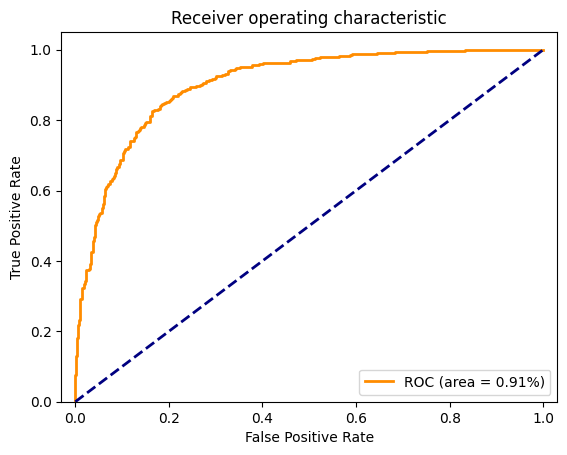

In [10]:
model_save_path = r"BiGRU_CNN.h5"
cv_clf.save(model_save_path)
print("Model saved to disk at:", model_save_path)
 
row=yscore.shape[0] 
yscore=yscore[np.array(range(1,row)),:] 
yscore_sum = pd.DataFrame(data=yscore) 
yscore_sum.to_csv('yscore.csv') 

 
ytest=ytest[np.array(range(1,row)),:] 
ytest_sum = pd.DataFrame(data=ytest) 
ytest_sum.to_csv('ytest.csv') 

 
fpr, tpr, _ = roc_curve(ytest[:,0], yscore[:,0])
auc_score=np.mean(scores, axis=0)[7]
colum = ['ACC', 'precision', 'npv', 'Sn', 'Sp', 'MCC', 'F1', 'AUC']
ro = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
#ro = ['1', '2', '3']
data_csv = pd.DataFrame(columns=colum, data=result, index=ro)
data_csv.to_csv(r'ACP_tr_cpasgantrain_results.csv')

 
data_csv = pd.DataFrame(columns=colum, data=result, index=ro) 
data_csv.to_csv('BiGRU_CNN.csv') 


lw=2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC (area = %0.2f%%)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.03, 1.03])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC.jpg")
plt.show()


#### Do testing on last saved Module from Cross Validation

this is test shape  (120, 71)
indepXtest after reshape ===============> (120, 1, 71)
this is the shape of Xtest (120, 1, 71)
this is the shape of Ytest (120,)
this is the shape of xtest (120, 71)
this is the shape of y_test (120, 1)
Loaded model from disk
4/4 [==============================] - 1s 3ms/step
acc=0.866667,precision=0.879310,npv=0.854839,sensitivity=0.850000,specificity=0.883333,mcc=0.733741,f1=0.864407,roc_auc=0.931111


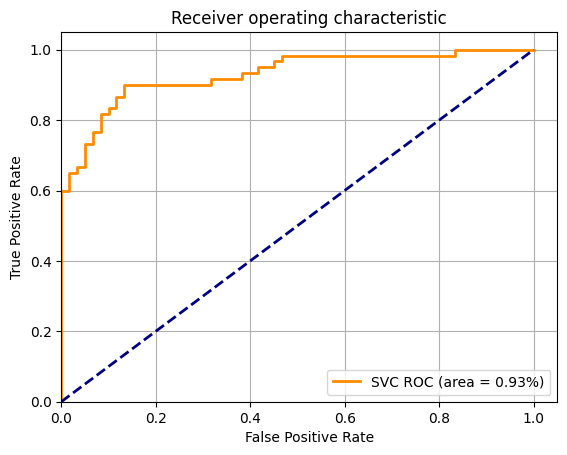

In [25]:
data_test = sio.loadmat('AVP_D2_CPSR_test.mat')
data_test = data_test.get('AVP_D2_CPSR_test')  # Remove the data in the dictionary
print("this is test shape ", data_test.shape)
label1_test = np.ones((60, 1))  # Value can be changed
label2_test = np.zeros((60, 1))
label_test = np.append(label1_test, label2_test)
scale_data = scale(data_test)
label_test = np.array(label_test)
indepxtest = scale_data
indepXtest = np.reshape(indepxtest,(-1,1,n1))
print("indepXtest after reshape ===============>",indepXtest.shape)

indepYtest = label_test
indepTesting(indepXtest, indepYtest)